In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as scy

In [35]:
GM=1.0
Theta = 1.0/(2.0-pow(2.0,1.0/3.0))
class Cuerpo:
  def __init__(self,x0,y0,z0,Vx0,Vy0,Vz0,m0):
    self.m=m0
    self.r=np.array([x0,y0,z0])
    self.V=np.array([Vx0,Vy0,Vz0])
    self.F=np.array([0,0,0])
    
  #Aqui no se esta calculando la fuerza, 
  #solo se esta calculando la aceleracion
  def CalculeFuerza(self):
    aux=-GM*self.m/np.linalg.norm(self.r)**3
    self.F = aux*self.r
          
  def Mueva_r(self, dt, Theta):
    self.r = self.r + self.V*(Theta*dt)/2


  def Mueva_V(self, dt, Theta):
    self.V = + self.V + self.F*(Theta*dt/self.m)

      
      

In [44]:
#Condiciones Inicia;es
dt=1e-3
Nsteps=int(1e5)
StepsPerFrame=int(1e2)
Nframes=Nsteps//StepsPerFrame
r0 =10


In [45]:
r0=10
omega=np.sqrt(GM/(r0**3))
T=2*np.pi/omega
V0=omega*r0

xdata=np.zeros(Nframes)
ydata=np.zeros(Nframes)
Planeta=Cuerpo(x0=r0,y0=0,z0=0,Vx0=0,Vy0=0.5*V0,Vz0=0,m0=0.453)



for i in range(Nsteps):
    t=i*dt
    if(i%StepsPerFrame==0):
        k = i//StepsPerFrame
        xdata[k]=Planeta.r[0]
        ydata[k]=Planeta.r[1]
        
    Planeta.Mueva_r(dt,Theta)
    Planeta.CalculeFuerza()
    Planeta.Mueva_V(dt,Theta)
    
    Planeta.Mueva_r(dt,1 - Theta)
    Planeta.CalculeFuerza()
    Planeta.Mueva_V(dt,1 - 2*Theta)

    Planeta.Mueva_r(dt,1 - Theta)
    Planeta.CalculeFuerza()
    Planeta.Mueva_V(dt,Theta)
    
    Planeta.Mueva_r(dt,Theta)

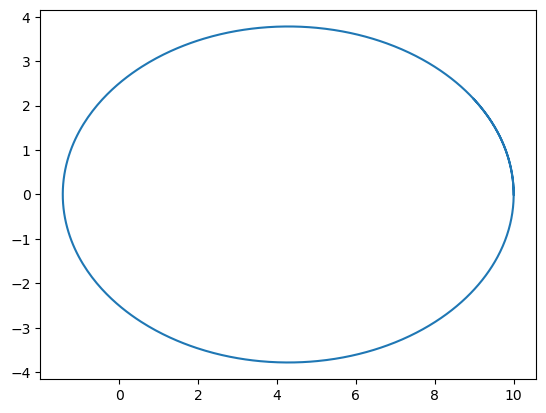

In [46]:
plt.plot(xdata,ydata)
plt.show()